NON LINEAR OPTIMISATION: CODING ASSIGNMENT 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from IPython import display
import ffmpeg

Generating Datapoints

In [12]:
def generate1(m, c):
    np.random.seed(1)
    U = np.random.uniform(-1,1,100)
    A = np.random.randn(100)
    B = m*A + c + U
    return A, B

In [82]:
def generate2():
    np.random.seed(1)
    Aplus = np.hstack((np.random.uniform(30,45,50).reshape(50,1), np.random.uniform(125,145,50).reshape(50,1)))
    Aminus = np.hstack((np.random.uniform(55,70,50).reshape(50,1), np.random.uniform(155,180,50).reshape(50,1)))
    A = np.vstack((Aplus, Aminus))
    B = np.vstack((-np.ones([50, 1]), np.ones([50, 1])))
    return A, B

Defining Objective Function

In [8]:
def function1(X1, X2, parameters):
    A, B = parameters
    n = len(A)
    f = 0
    for i in range(n):
        f += (B[i]-A[i]*X1-X2)**2
    f /= n
    return f

In [83]:
def function2(X1, X2, X3, parameters):
    A, B = parameters
    n = len(A)
    f = 0
    for i in range(n):
        f += np.log(1 + np.e**(-B[i]*(X1*A[i,0]+X2*A[i,1]+X3)))
    f /= n
    return f

Gradients and Stochastic Gradients

In [9]:
def gradient1(x, parameters):
    A, B = parameters
    n = len(A)
    grad = np.zeros([2, 1])
    for i in range(n):
        grad[0] += -2*(B[i]-A[i]*x[0]-x[1])*A[i]
        grad[1] += -2*(B[i]-A[i]*x[0]-x[1])
    grad /= n
    return grad.T

def stochastic_gradient1(x, parameters, batch_size, batch):
    A, B = parameters
    grad = np.zeros([2, 1])
    A = A[batch_size*batch:batch_size*(batch+1)]
    B = B[batch_size*batch:batch_size*(batch+1)]
    for i in range(batch_size):
        grad[0] += -2*(B[i]-A[i]*x[0]-x[1])*A[i]
        grad[1] += -2*(B[i]-A[i]*x[0]-x[1])
    grad /= batch_size
    return grad.T

# def stochastic_gradient_rand(x, parameters, batch_size):
#     A, B = parameters
#     grad = np.zeros([2, 1])
#     A = np.array(random.choices(A, k=batch_size)).reshape(-1, 1)
#     B = np.array(random.choices(B, k=batch_size)).reshape(-1, 1)
#     for i in range(batch_size):
#         grad[0] += -2*(B[i]-A[i]*x[0]-x[1])*A[i]
#         grad[1] += -2*(B[i]-A[i]*x[0]-x[1])
#     grad /= batch_size
#     return grad.T

In [84]:
def gradient2(x, parameters):
    A, B = parameters
    n = len(A)
    X1, X2, X3 = x
    grad = np.zeros([3, 1])
    for i in range(n):
        exponent = np.e**(-B[i]*(X1*A[i,0]+X2*A[i,1]+X3))
        fraction = exponent/(1 + exponent)
        grad[0] += -fraction*B[i]*A[i,0]
        grad[1] += -fraction*B[i]*A[i,1]
        grad[2] += -fraction*B[i]
    grad /= n
    return grad.T

def stochastic_gradient2(x, parameters, batch_size, batch):
    A, B = parameters
    X1, X2, X3 = x
    grad = np.zeros([3, 1])
    A = A[batch_size*batch:batch_size*(batch+1)]
    B = B[batch_size*batch:batch_size*(batch+1)]
    for i in range(batch_size):
        exponent = np.e**(-B[i]*(X1*A[i,0]+X2*A[i,1]+X3))
        fraction = exponent/(1 + exponent)
        grad[0] += -fraction*B[i]*A[i,0]
        grad[1] += -fraction*B[i]*A[i,1]
        grad[2] += -fraction*B[i]
    grad /= batch_size
    return grad.T

Gradient Descent and Stochastic Gradient Descent

In [10]:
def gradient_descent1(initial_val, parameters, iterations, alpha_val):
    iter_val = np.zeros([iterations+1, 1])
    iter_val[iterations] = iterations 
    x_val = np.zeros([iterations+1, 2])
    x_val[0] = initial_val
    for i in range(iterations):
        iter_val[i] = i
        x_val[i+1] = x_val[i] - alpha_val*gradient1(x_val[i], parameters)
    return iter_val, x_val

def stochastic_descent1(initial_val, parameters, batch_size, iterations, alpha_val):
    n = len(parameters[0])
    num_batches = int(n/batch_size)
    k = iterations*num_batches
    iter_val = np.zeros([k+1, 1])
    iter_val[k] = k 
    x_val = np.zeros([k+1, 2])
    x_val[0] = initial_val
    for i in range(k):
        iter_val[i] = i
        x_val[i+1] = x_val[i] - alpha_val*stochastic_gradient1(x_val[i], parameters, batch_size, i%num_batches)
        # x_val[i+1] = x_val[i] - alpha_val*stochastic_gradient_rand(x_val[i], parameters, batch_size)
    return iter_val, x_val

In [85]:
def gradient_descent2(initial_val, parameters, iterations, alpha_val):
    iter_val = np.zeros([iterations+1, 1])
    iter_val[iterations] = iterations 
    x_val = np.zeros([iterations+1, 3])
    x_val[0] = initial_val
    for i in range(iterations):
        iter_val[i] = i
        x_val[i+1] = x_val[i] - alpha_val*gradient2(x_val[i], parameters)
    return iter_val, x_val

def stochastic_descent2(initial_val, parameters, batch_size, iterations, alpha_val):
    n = len(parameters[0])
    num_batches = int(n/batch_size)
    k = iterations*num_batches
    iter_val = np.zeros([k+1, 1])
    iter_val[k] = k 
    x_val = np.zeros([k+1, 3])
    x_val[0] = initial_val
    for i in range(k):
        iter_val[i] = i
        x_val[i+1] = x_val[i] - alpha_val*stochastic_gradient2(x_val[i], parameters, batch_size, i%num_batches)
        # x_val[i+1] = x_val[i] - alpha_val*stochastic_gradient_rand(x_val[i], parameters, batch_size)
    return iter_val, x_val

Q1. Linear Regression

In [13]:
#Initialising parameters
parameters = generate1(2, 3)
A, B = parameters
n = len(parameters[0])

initial_val = np.array([-2, -4])
iterations = 100
batch_size = 10

num_batches = int(n/batch_size)
T = iterations*num_batches

In [61]:
print(x_val_sd[10:])

[[ 9.85762752 -2.77153886  1.99303894]
 [ 9.85746601 -2.77212466  1.99303472]
 [ 9.68987446 -3.31588571  1.98901517]
 ...
 [10.89571062 -3.03046876  1.87421294]
 [10.89571062 -3.03046876  1.87421294]
 [10.89571062 -3.03046876  1.87421294]]


In [190]:
#Initialising parameters
parameters = generate2()
A, B = parameters
n = len(parameters[0])

initial_val = np.array([.1, .2, .2])
iterations = 100
batch_size = 10

num_batches = int(n/batch_size)
T = iterations*num_batches

alpha_val = 0.01
#Running Gradient Descent
x_val_gd = gradient_descent2(initial_val, parameters, T, alpha_val)[1]
x_star_gd = x_val_gd[T]
f_val_gd = np.zeros([T+1, 1])

#Running Stochastic Gradient Descent
time, x_val_sd = stochastic_descent2(initial_val, parameters, batch_size, iterations, alpha_val)
x_star_sd = x_val_sd[T]
f_val_sd = np.zeros([T+1, 1])

for i in range(T+1):
    f_val_gd[i] = function2(x_val_gd[i,0], x_val_gd[i,1], x_val_gd[i,2], parameters)
    f_val_sd[i] = function2(x_val_sd[i,0], x_val_sd[i,1], x_val_gd[i,2], parameters)

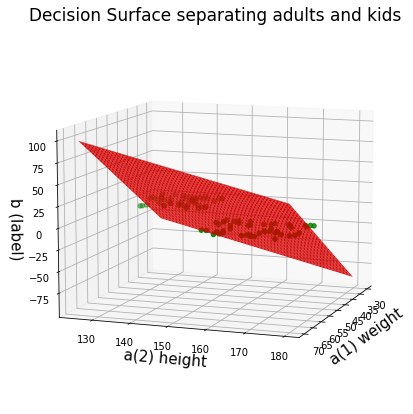

In [208]:
plt.figure(figsize = (7, 7))
ax = plt.axes(projection ='3d')

ax.scatter3D(A[:,0], A[:,1], B, color = 'green')
x = np.linspace(np.min(A[:,0]), np.max(A[:,0]), 100)
y = np.linspace(np.min(A[:,1]), np.max(A[:,1]), 100)
x, y = np.meshgrid(x,y)

ax.set_xlabel('a(1) weight', fontsize = 15)
ax.set_ylabel('a(2) height', fontsize = 15)
ax.set_zlabel('b (label)', fontsize = 15)
plt.title('Decision Surface separating adults and kids', fontsize = 17)
ax.view_init(10, 20)

ax.plot_surface(x, y, x*x_val_gd[T,0]+y*x_val_gd[T,1]+x_val_gd[T,2], color = 'red')

plt.show()

In [198]:
x = x_val_sd
fig = plt.figure(figsize = (7, 7))
plt.xlim(-200, 200)
plt.ylim(-200, 200)
plt.scatter(A[:50,0], A[:50,1])
plt.scatter(A[50:,0], A[50:,1])
plt.legend(['kids', 'adults'])
u = np.linspace(np.min(A[:,0]), np.max(A[:,0]), 100)
y = np.linspace(np.min(A[:,1]), np.max(A[:,1]), 100)
# plt.plot(u, u*x[T,0]+y*x[T,1]+x[T,2])

# Best Fit Line animation
lines = plt.plot([])
line = lines[0]

plt.xlabel('a(1) weight', fontsize=15)
plt.ylabel('a(2) height', fontsize=15)
plt.title(f': Best Fit Line for alpha = {alpha_val}, T = 1000', fontsize=16)
def animate(frame):
    line.set_data((u, -(u*x[frame,0]+y*x[frame,1]+x[frame,2]))) 

anim = FuncAnimation(fig, animate, frames=500, interval=20)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

Alpha = 0.1, T = 1000 : |xₜ - x⁎| vs t plot, Best Fit Line, Contours and Descent Path

In [ ]:
alpha_val = 0.1
#Running Gradient Descent
x_val_gd = gradient_descent1(initial_val, parameters, T, alpha_val)[1]
x_star_gd = x_val_gd[T]
f_val_gd = np.zeros([T+1, 1])

#Running Stochastic Gradient Descent
time, x_val_sd = stochastic_descent1(initial_val, parameters, batch_size, iterations, alpha_val)
x_star_sd = x_val_sd[T]
f_val_sd = np.zeros([T+1, 1])

for i in range(T+1):
    f_val_gd[i] = function1(x_val_gd[i,0], x_val_gd[i,1], parameters)
    f_val_sd[i] = function1(x_val_sd[i,0], x_val_sd[i,1], parameters)

plt.figure(figsize = (7, 7))
plt.plot(time, np.linalg.norm(x_val_gd-x_star_gd, axis=1, keepdims=True), 'g', linewidth = 3)
plt.plot(time, np.linalg.norm(x_val_sd-x_star_sd, axis=1, keepdims=True), 'r', linewidth = 1)
plt.xlabel('Iteration t', fontsize=14)
plt.ylabel('|xₜ - x⁎|', fontsize=15)
plt.legend(['Gradient Descent', 'Stochastic Descent'])
plt.show()

count = {0 : 'Gradient Descent', 1 : 'Stochastic Descent'}
i = 0

for x in [x_val_gd, x_val_sd]:

    #Best Fit Line animation
    fig = plt.figure(figsize = (7, 7))

    lines = plt.plot([])
    line = lines[0]

    plt.xlim(-3, 3)
    plt.ylim(-3, 9)
    plt.scatter(A, B, color = 'red')
    plt.xlabel('a (dim 1)', fontsize=15)
    plt.ylabel('b (dim 2)', fontsize=15)
    plt.title(count[i]+f': Best Fit Line for alpha = {alpha_val}, T = 1000', fontsize=16)
    def animate(frame):
        line.set_data((A, A*x[frame,0]+x[frame,1])) 

    anim = FuncAnimation(fig, animate, frames=100, interval=20)
    video = anim.to_html5_video()
    html = display.HTML(video)
    display.display(html)
    plt.close()

    #Plotting contours
    x1 = np.linspace(-5, 5, 100).reshape(100, 1)
    x2 = np.linspace(-5, 5, 100).reshape(100, 1)

    X1, X2 = np.meshgrid(x1, x2)
    Z = function(X1, X2, parameters)

    fig = plt.figure(figsize = (7, 7))

    #Setting the axes properties
    ax = fig.add_subplot(projection='3d')

    ax.set_xlim3d([-5.0, 5.0])
    ax.set_xlabel('x(1)', fontsize = 15)

    ax.set_ylim3d([-5.0, 5.0])
    ax.set_ylabel('x(2)', fontsize = 15)

    ax.set_zlim3d([0.0, np.max(Z)])
    ax.set_zlabel('f(x(1), x(2))', fontsize = 15)

    ax.contour3D(X1, X2, Z, 50, cmap='viridis')
    plt.title(count[i]+f': Descent path for alpha = {alpha_val}, T = 1000', fontsize=16)
    i += 1
    ax.view_init(30, 10)

    #Generating animation for path
    def gen(n):
        n = len(x_val_sd)
        for i in range(n):
            yield np.array([x[i, 0], x[i, 1], function1(x[i, 0], x[i, 1], parameters)])

    def update(num, data, line):
        line.set_data(data[:2, :num])
        line.set_3d_properties(data[2, :num])

    N = 100
    data = np.array(list(gen(N))).T
    line, = ax.plot(data[0, 0:1], data[1, 0:1], data[2, 0:1], linewidth=3)

    anim = FuncAnimation(fig, update, N, fargs=(data, line), interval=0.2*N, blit=False)
    video = anim.to_html5_video()
    html = display.HTML(video)
    display.display(html)
    plt.close()

Alpha = 0.01, T = 1000 : |xₜ - x⁎| vs t plot, Best Fit Line, Contours and Descent Path

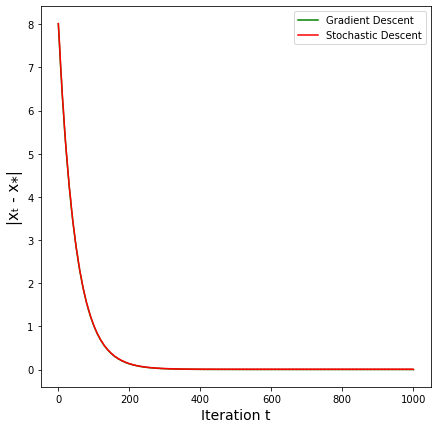

In [284]:
alpha_val = 0.01
#Running Gradient Descent
x_val_gd = gradient_descent1(initial_val, parameters, T, alpha_val)[1]
x_star_gd = x_val_gd[T]
f_val_gd = np.zeros([T+1, 1])

#Running Stochastic Gradient Descent
time, x_val_sd = stochastic_descent1(initial_val, parameters, batch_size, iterations, alpha_val)
x_star_sd = x_val_sd[T]
f_val_sd = np.zeros([T+1, 1])

for i in range(T+1):
    f_val_gd[i] = function1(x_val_gd[i,0], x_val_gd[i,1], parameters)
    f_val_sd[i] = function1(x_val_sd[i,0], x_val_sd[i,1], parameters)

plt.figure(figsize = (7, 7))
plt.plot(time, np.linalg.norm(x_val_gd-x_star_gd, axis=1, keepdims=True), 'g')
plt.plot(time, np.linalg.norm(x_val_sd-x_star_sd, axis=1, keepdims=True), 'r')
plt.xlabel('Iteration t', fontsize=14)
plt.ylabel('|xₜ - x⁎|', fontsize=15)
plt.legend(['Gradient Descent', 'Stochastic Descent'])
plt.show()

count = {0 : 'Gradient Descent', 1 : 'Stochastic Descent'}
i = 0

for x in [x_val_gd, x_val_sd]:

    #Best Fit Line animation
    fig = plt.figure(figsize = (7, 7))

    lines = plt.plot([])
    line = lines[0]

    plt.xlim(-3, 3)
    plt.ylim(-3, 9)
    plt.scatter(A, B, color = 'red')
    plt.xlabel('a (dim 1)', fontsize=15)
    plt.ylabel('b (dim 2)', fontsize=15)
    plt.title(count[i]+f': Best Fit Line for alpha = {alpha_val}, T = 1000', fontsize=16)
    def animate(frame):
        line.set_data((A, A*x[frame,0]+x[frame,1])) 

    anim = FuncAnimation(fig, animate, frames=250, interval=20)
    video = anim.to_html5_video()
    html = display.HTML(video)
    display.display(html)
    plt.close()

    #Plotting contours
    x1 = np.linspace(-5, 5, 100).reshape(100, 1)
    x2 = np.linspace(-5, 5, 100).reshape(100, 1)

    X1, X2 = np.meshgrid(x1, x2)
    Z = function(X1, X2, parameters)

    fig = plt.figure(figsize = (7, 7))

    #Setting the axes properties
    ax = fig.add_subplot(projection='3d')

    ax.set_xlim3d([-5.0, 5.0])
    ax.set_xlabel('x(1)', fontsize = 15)

    ax.set_ylim3d([-5.0, 5.0])
    ax.set_ylabel('x(2)', fontsize = 15)

    ax.set_zlim3d([0.0, np.max(Z)])
    ax.set_zlabel('f(x(1), x(2))', fontsize = 15)

    ax.contour3D(X1, X2, Z, 50, cmap='viridis')
    plt.title(count[i]+f': Descent path for alpha = {alpha_val}, T = 1000', fontsize=16)
    i += 1
    ax.view_init(30, 10)

    #Generating animation for path
    def gen(n):
        n = len(x_val_sd)
        for i in range(n):
            yield np.array([x[i, 0], x[i, 1], function1(x[i, 0], x[i, 1], parameters)])

    def update(num, data, line):
        line.set_data(data[:2, :num])
        line.set_3d_properties(data[2, :num])

    N = 100
    data = np.array(list(gen(N))).T
    line, = ax.plot(data[0, 0:1], data[1, 0:1], data[2, 0:1], linewidth=3)

    anim = FuncAnimation(fig, update, int(2.5*N), fargs=(data, line), interval=0.2*N, blit=False)
    video = anim.to_html5_video()
    html = display.HTML(video)
    display.display(html)
    plt.close()